In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
comcast = pd.read_csv(r"C:\Users\e0519050\Downloads\Simplilrarn\Python\Project_Submission\Comcast_telecom_complaints_data\Comcast_telecom_complaints_data.csv")

In [3]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast.shape

(2224, 11)

In [5]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
comcast["DateTime"] = comcast.Date +" "+ comcast.Time
comcast.DateTime[:2]

0     22-04-15 3:53:50 PM
1    04-08-15 10:22:56 AM
Name: DateTime, dtype: object

In [7]:
comcast.DateTime = pd.to_datetime(comcast.DateTime,format= "%d-%m-%y %I:%M:%S %p")
comcast[:2]

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56


In [8]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
DateTime                       2224 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 208.6+ KB


In [9]:
comcast.drop(['Date','Date_month_year','Time'],axis=1,inplace=True)

In [10]:
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56


In [11]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
DateTime                       2224 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 156.5+ KB


In [12]:
comcast["Day"] = pd.DatetimeIndex(comcast["DateTime"]).day
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Day
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4


In [13]:
comcast["Month"] = pd.DatetimeIndex(comcast["DateTime"]).month
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Day,Month
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8


In [14]:
comcast["Year"] = pd.DatetimeIndex(comcast["DateTime"]).year
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Day,Month,Year
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015


In [15]:
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Day,Month,Year
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015


Monthly Granuality Level

In [16]:
comcast.groupby("Month").count()['Customer Complaint']

Month
1       55
2       59
3       45
4      375
5      317
6     1046
7       49
8       67
9       55
10      53
11      38
12      65
Name: Customer Complaint, dtype: int64

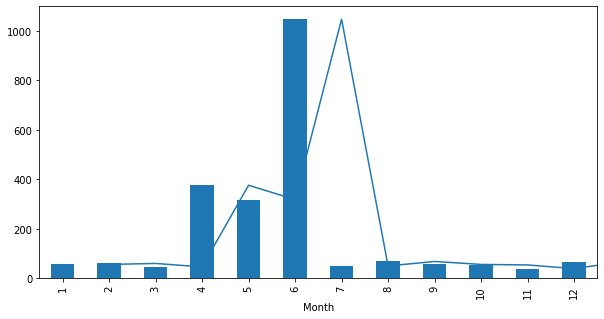

In [17]:
plt.figure(figsize = [10, 5]) #ininches
comcast.groupby("Month").count()['Customer Complaint'].plot(kind = "line")
comcast.groupby("Month").count()['Customer Complaint'].plot(kind = "bar") 
plt.xticks(np.arange(12), [1,2,3,4,5,6,7,8,9,10,11,12] ) 
plt.show()  #to suppress text

In [18]:
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Day,Month,Year
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015


To Group the complains  by Daily Granuality level we need to convert day to str type

In [19]:
comcast["Day"] = comcast["Day"].astype("str")

In [20]:
comcast["Month"] = comcast["Month"].astype("str")

In [21]:
comcast["DayMonth"] = comcast["Day"]+" "+comcast["Month"]

In [22]:
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Day,Month,Year,DayMonth
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015,22 4
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015,4 8


In [23]:
comcast["DayMonth"] = comcast.DateTime.apply(lambda x: x.strftime("%d-%b"))

In [24]:
comcast[:2]

,Ticket #,Customer Complaint,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,DateTime,Day,Month,Year,DayMonth
0,250635,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,22,4,2015,22-Apr
1,223441,Payment disappear - service got disconnected,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,4,8,2015,04-Aug


In [25]:
comcast.groupby("DayMonth").count()['Customer Complaint']

DayMonth
04-Apr    12
04-Aug    28
04-Dec    15
04-Feb    27
04-Jan    18
          ..
29-May    14
30-Apr    24
30-Jun    53
30-May     9
31-May    10
Name: Customer Complaint, Length: 91, dtype: int64

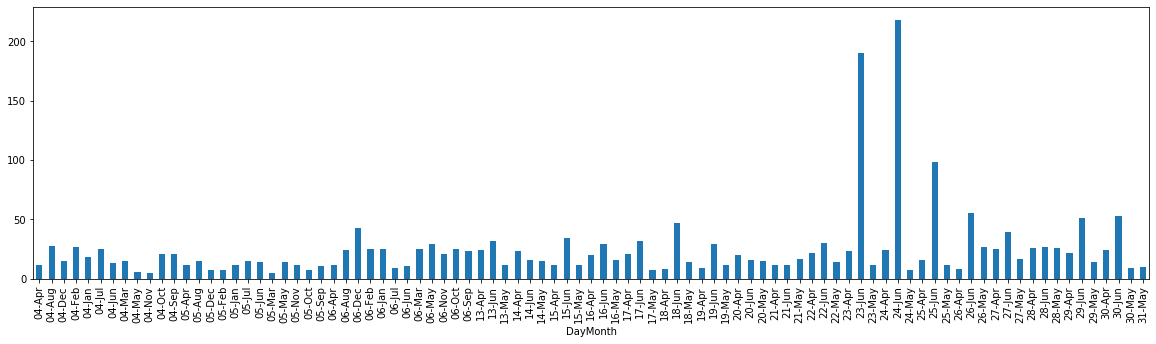

In [26]:
plt.figure(figsize = [20, 5])
comcast.groupby("DayMonth").count()['Customer Complaint'].plot(kind = "bar")
plt.show()

Plot Shows Highest complains registered on 24th June 

In [27]:
comcast['Customer Complaint']

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [28]:
Complaint = ". ".join(comcast["Customer Complaint"]).lower()

In [29]:
Complaint

'comcast cable internet speeds. payment disappear - service got disconnected. speed and service. comcast imposed a new usage cap of 300gb that punishes streaming.. comcast not working and no service to boot. isp charging for arbitrary data limits with overage fees. throttling service and unreasonable data caps. comcast refuses to help troubleshoot and correct my service.. comcast extended outages. comcast raising prices and not being available to ask why. billing after service was asked to be disconnected. yahoo failure to restore email search feature. comcast violating open internet rules by blocking hbo go access on sony consoles. internet speed. internet disconnects every night. internet complaint. internet availability and speed. comcast owes me $65 and claims i need to return equipment i never had. horrible internet service. failure to provide services that i am billed for.. internet out all the time but they have a monopoly. horrible cable service and customer service. speed. com

In [30]:
!pip install wordcloud

In [31]:
from wordcloud import WordCloud, STOPWORDS

In [32]:
text = list(STOPWORDS) + ['comcast']

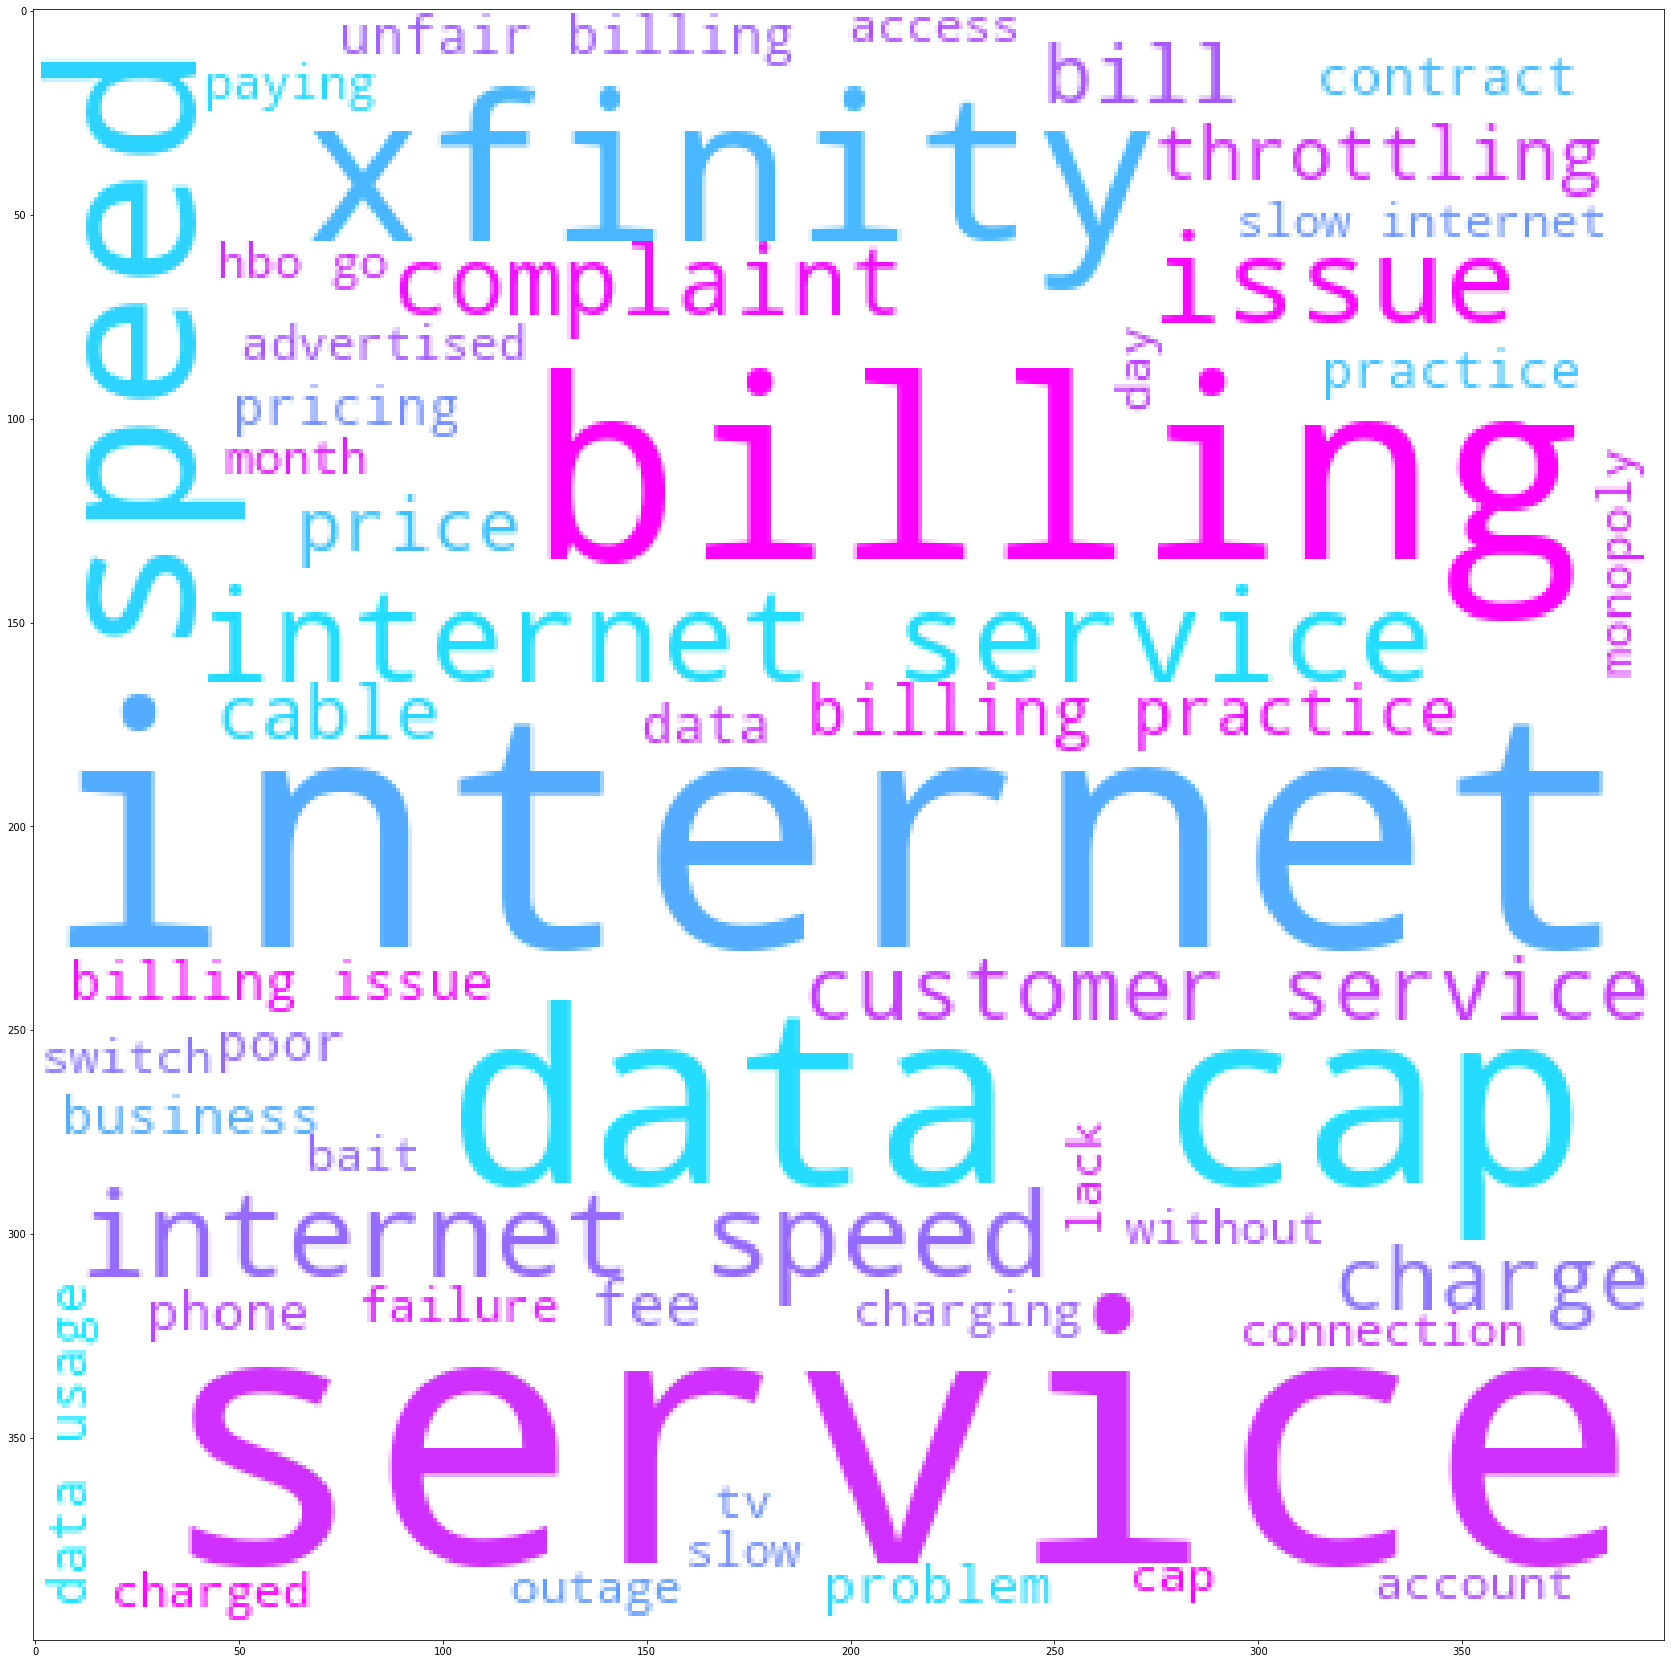

In [33]:
wordcloud = WordCloud(width = 400, height =400, background_color='white', random_state=10,stopwords = text,
                      max_words=50,
                      normalize_plurals=True, prefer_horizontal=.9, font_step=2, colormap='cool').generate(Complaint)
fig = plt.figure(figsize = (40,30))
plt.imshow(wordcloud)
plt.show()

In [34]:
list_Comp = Complaint.split()
list_Comp[:10]

['comcast',
 'cable',
 'internet',
 'speeds.',
 'payment',
 'disappear',
 '-',
 'service',
 'got',
 'disconnected.']

In [35]:
import string

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
a = string.punctuation + 'comcast' + 'got' +'and'
a

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~comcastgotand'

In [38]:
list_complaint =[ word for word in list_Comp if word not in a]
list_complaint[:10]

['cable',
 'internet',
 'speeds.',
 'payment',
 'disappear',
 'service',
 'disconnected.',
 'speed',
 'service.',
 'imposed']

In [39]:
complaint = pd.Series(list_complaint)

In [40]:
type(complaint)

pandas.core.series.Series

In [41]:
complaint.value_counts()[:5]

internet    413
service     226
data        214
comcast.    195
billing     193
dtype: int64

From above amd word cloud we observr that internet ,service, data, billing have most no. of complains so we will create a data frame to get exact as we see observe comcast. as  part of series to avoid such puctuation mistakes we use regular expression to get the counts

In [42]:
import re

In [43]:
df = pd.DataFrame({"index": range(comcast.shape[0])})

In [44]:
df.head()

,index
0,0
1,1
2,2
3,3
4,4


In [45]:
comcast ["Customer Complaint"] = comcast["Customer Complaint"].str.lower()

In [46]:
df ["speed"] = comcast["Customer Complaint"].str.extract("(speed)")

In [47]:
df ["internet"] = comcast["Customer Complaint"].str.extract("(internet)")

In [48]:
df ["service"] = comcast["Customer Complaint"].str.extract("(service)")

In [49]:
df ["billing"] = comcast["Customer Complaint"].str.extract("(billing)")

In [50]:
df ["cable"] = comcast["Customer Complaint"].str.extract("(cable)")

In [51]:
df ["payment"] = comcast["Customer Complaint"].str.extract("(payment)")

In [52]:
df.notnull().sum()

index       2224
speed        192
internet     532
service      489
billing      298
cable         58
payment       13
dtype: int64

In [53]:
df

,index,speed,internet,service,billing,cable,payment
0,0,speed,internet,NaN,NaN,cable,NaN
1,1,NaN,NaN,service,NaN,NaN,payment
2,2,speed,NaN,service,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,service,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2219,2219,NaN,NaN,service,NaN,NaN,NaN
2220,2220,NaN,NaN,NaN,billing,NaN,NaN
2221,2221,NaN,NaN,NaN,NaN,NaN,NaN
2222,2222,NaN,NaN,NaN,NaN,NaN,NaN


Changing Status pending to Open and solved as Closed

In [56]:
comcast["Status"][:7]

0     Closed
1     Closed
2     Closed
3       Open
4     Solved
5     Solved
6    Pending
Name: Status, dtype: object

In [57]:
comcast["Status"] = comcast.Status.replace({"Pending":"Open","Solved":"Closed"})
comcast["Status"][:7]

0    Closed
1    Closed
2    Closed
3      Open
4    Closed
5    Closed
6      Open
Name: Status, dtype: object

In [58]:
comcast.Status.value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

state wise status of complaints in a stacked bar chart

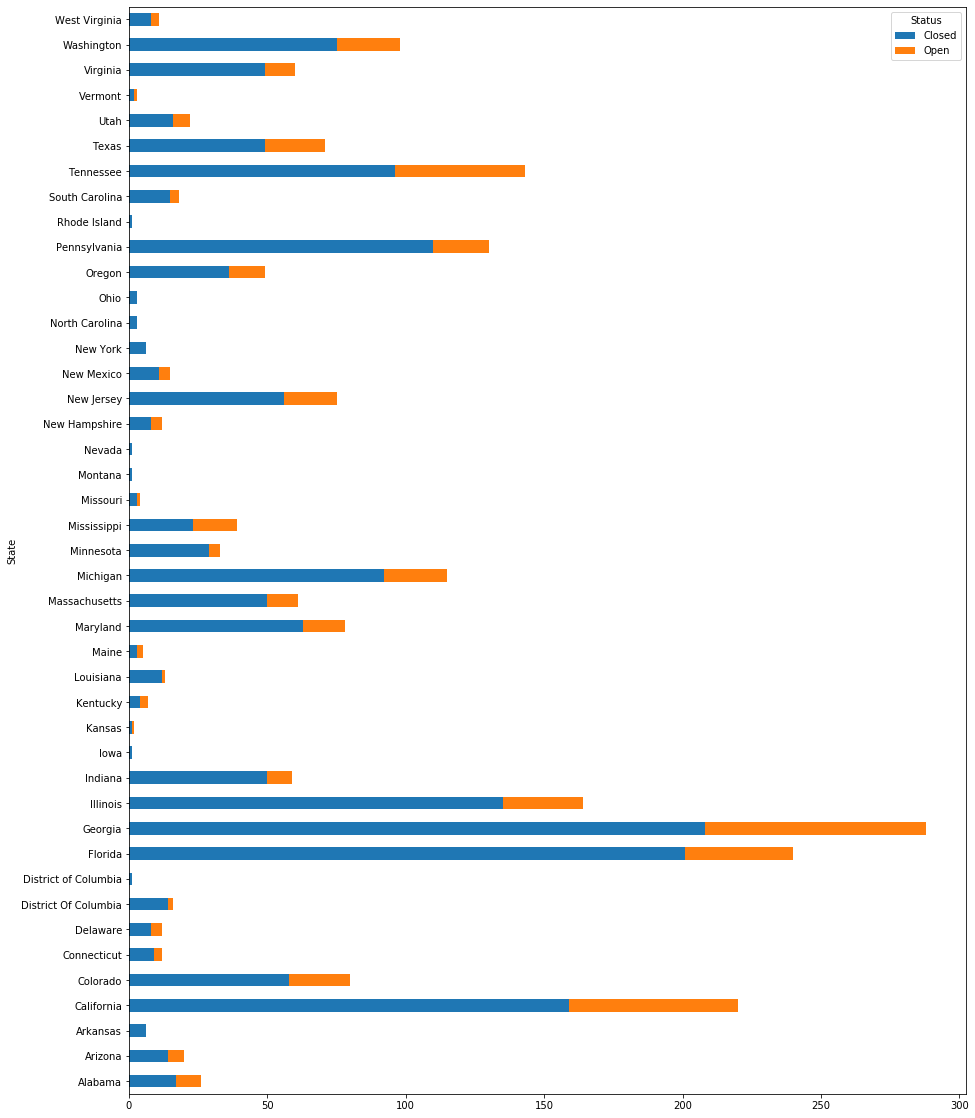

In [65]:
comcast.groupby(["State","Status"]).count()["Customer Complaint"].unstack().plot(kind="barh",stacked="True",
                                                                               figsize=(15,20))
plt.show()

In [91]:
df =pd.crosstab(comcast.State, comcast.Status)
df

Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


State has the highest percentage of unresolved complaints

In [98]:
df.Open.idxmax()

'Georgia'

In [137]:
df1 =pd.crosstab(comcast.State, comcast.Status,margins=True)

In [139]:
df1['Percent']=(df1.Open*100)/df1.All
df1

Status,Closed,Open,All,Percent
State,,,,
Alabama,17,9,26,34.615385
Arizona,14,6,20,30.000000
Arkansas,6,0,6,0.000000
California,159,61,220,27.727273
Colorado,58,22,80,27.500000
Connecticut,9,3,12,25.000000
Delaware,8,4,12,33.333333
District Of Columbia,14,2,16,12.500000
District of Columbia,1,0,1,0.000000


In [144]:
df1.loc[['Georgia']]

Status,Closed,Open,All,Percent
State,,,,
Georgia,208,80,288,27.777778


In [146]:
df1.Percent.idxmax()


'Kansas'

In [147]:
df1.loc[['Kansas']]

Status,Closed,Open,All,Percent
State,,,,
Kansas,1,1,2,50.0


percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [148]:
df = comcast.groupby(["Received Via","Status"]).count()["Customer Complaint"].unstack()


In [131]:
df['total']= df.Open + df.Closed

In [132]:
df

Status,Closed,Open,total
Received Via,,,
Customer Care Call,864,255,1119
Internet,843,262,1105


In [136]:
df['percent'] = (df.Closed*100)/df.total
df

Status,Closed,Open,total,percent
Received Via,,,,
Customer Care Call,864,255,1119,77.211796
Internet,843,262,1105,76.289593


Resolved complains Received Via Customer Care Call = 77.21% and 
Resolved complains Received ViaInternet = 76.28%